<a href="https://colab.research.google.com/github/prasanthmalapati/cse/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/CountryCluster.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [ ]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

In [ ]:
x=data.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [ ]:
kmeans=KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [ ]:
identified_clusters=kmeans.fit_predict(x)
identified_clusters

array([2, 2, 0, 0, 0, 1], dtype=int32)

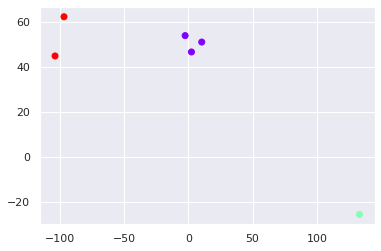

In [ ]:
data_with_clusters=data.copy()
data_with_clusters['clusters']=identified_clusters
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['clusters'],cmap='rainbow')

Text(0, 0.5, 'wcss')

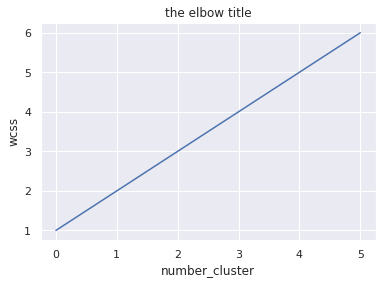

In [ ]:
wcss=[]
for i in range(1,7):
  kmeans=KMeans(i)
  kmeans.fit(x)
  wcss_iter=kmeans.inertia_
  wcss.append(wcss_iter)
number_cluster=range(1,7)
plt.plot(number_cluster)
plt.title('the elbow title')
plt.xlabel('number_cluster')
plt.ylabel('wcss')